In [1]:
import pandas as pd
import tensorflow as tf

2023-06-16 21:30:29.214482: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-16 21:30:29.216891: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 21:30:29.251864: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 21:30:29.252358: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 21:30:29.952068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# read small mol phase 3 features
small_mol_phase_3_features = pd.read_csv("..//Data/smiles_with_rdkit_with_small_phase_3_features.csv")

In [3]:
# small_mol_phase_3_features.head()

In [4]:
model_both = tf.keras.models.load_model("..//Base_Models//Model_BOTH_Smiles")

2023-06-16 21:30:30.811235: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-06-16 21:30:30.970863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-06-16 21:30:30.970945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMEN

In [5]:
# model_smiles =  tf.keras.models.load_model("..//Base_Models//Model_BOTH_Smiles")

In [6]:
model_both.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 512)         22016     
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                             

In [7]:
model_rdkit =  tf.keras.models.load_model("..//Base_Models//Model_BOTH_Rdkit")

In [8]:
model_rdkit.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 104)]             0         
                                                                 
 dense_6 (Dense)             (None, 64)                6720      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 2)                 66        
                                                                 
Total params: 14,082
Trainable params: 14,082
Non-trainable

In [9]:
extract_bottleneck_Smiles = tf.keras.models.Model(model_both.input, model_both.layers[-2].output)

In [10]:
extract_bottleneck_Rdkit = tf.keras.models.Model(model_rdkit.input, model_rdkit.layers[-2].output)

In [11]:
bottleneck_features_Smiles = extract_bottleneck_Smiles(small_mol_phase_3_features["Smiles"].values)

In [12]:
# bottleneck_features_Smiles

In [13]:
# small_mol_phase_3_features.iloc[:,1:].values

In [14]:
bottleneck_features_rdkit = extract_bottleneck_Rdkit(small_mol_phase_3_features.iloc[:,1:].values)

In [15]:
import numpy as np

In [16]:
np.save("..//Data//small_mol_phase_3_features_using_Smiles.npy", bottleneck_features_Smiles)

In [17]:
np.save("..//Data//small_mol_phase_3_features_using_Rdkit.npy", bottleneck_features_rdkit)

In [18]:
# bottleneck_features.shape

In [19]:
model_both

In [20]:
# small_mol_phase_3_psa_preds = model_both(small_mol_phase_3_features["Smiles"].values

In [21]:
# small_mol_phase_3_psa_preds

In [22]:
smiles_outputs = model_both(small_mol_phase_3_features["Smiles"].values)

In [23]:
np.save("..//Data//smiles_outputs.npy", smiles_outputs)

In [24]:
smiles_outputs

<tf.Tensor: shape=(959, 2), dtype=float32, numpy=
array([[-0.008663  , -0.32012644],
       [ 0.3382033 , -0.31685376],
       [ 0.11221686, -1.2013034 ],
       ...,
       [-2.202789  ,  0.2556882 ],
       [ 2.5921938 , -0.50616574],
       [-0.57648194,  1.1811748 ]], dtype=float32)>

In [25]:
rdkit_outputs = model_rdkit(small_mol_phase_3_features.iloc[:,1:].values)

In [26]:
np.save("..//Data//rdkit_outputs.npy", rdkit_outputs)

In [27]:
rdkit_outputs

<tf.Tensor: shape=(959, 2), dtype=float32, numpy=
array([[ 0.06570726, -0.32998377],
       [ 0.87675816,  0.29321992],
       [ 0.28803545, -1.1519144 ],
       ...,
       [-2.214185  ,  0.11834963],
       [ 2.6153378 , -0.6131378 ],
       [-0.33488664,  1.1420501 ]], dtype=float32)>

In [28]:
actual  = pd.read_csv("..//Data/smiles_with_rdkit_with_small_phase_3_outputs.csv").iloc[:,1:]

In [29]:
import pickle

In [30]:
std_targets = pickle.load( open('..//Data//target_scaler.pkl', 'rb'))

/home/statgrads/vpiyush2/.conda/envs/enkf/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [31]:
np.sqrt(((actual - std_targets.inverse_transform(smiles_outputs))**2).mean(0))

AlogP                 0.138200
Polar Surface Area    2.238709
dtype: float64

In [32]:
# np.sqrt(((y_test_actual - small_mol_phase_3_psa_preds.mean(0))**2).mean(0))

In [33]:
import matplotlib.pyplot as plt

In [ ]:
# small_mol_phase_3_psa_preds = model_both(small_mol_phase_3_features["Smiles"].values

In [35]:
small_mol_phase_3_psa_preds = std_targets.inverse_transform(smiles_outputs)

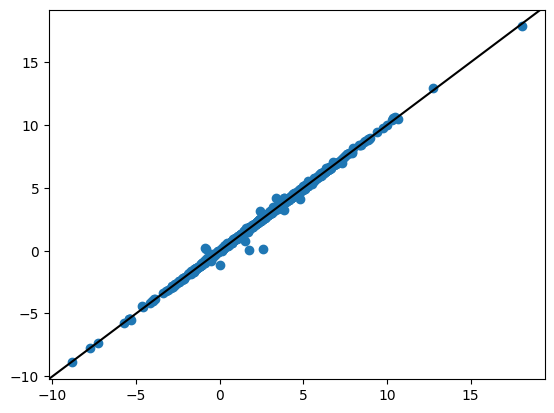

In [39]:
plt.scatter(small_mol_phase_3_psa_preds[:,0],actual.iloc[:,0])
plt.axline((0,0), slope = 1, c = "black")
# plt.ylim(0,500)
plt.show()

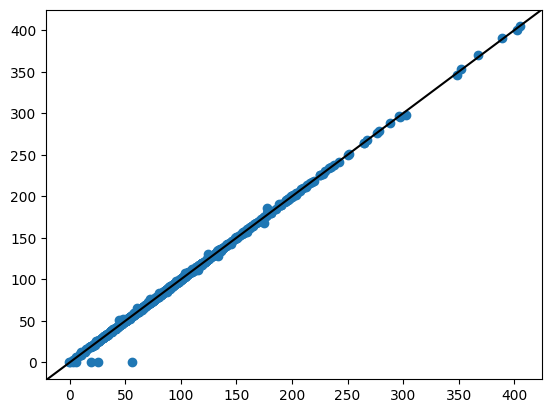

In [40]:
plt.scatter(small_mol_phase_3_psa_preds[:,1],actual.iloc[:,1])
plt.axline((0,0), slope = 1, c = "black")
# plt.ylim(0,500)
plt.show()